In [4]:
import pandas as pd

In [5]:
mnist_df = pd.read_csv('./data/mnist.csv')

In [6]:
x_vals = mnist_df.iloc[:,1:].values

In [7]:
mnist_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
x_vals.shape   #No of images : 42000 with 784 pixels

(42000, 784)

In [9]:
y_labels = mnist_df['label'].values

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import numpy as np

In [11]:
def show_image(vals):
    plt.imshow(x_vals[vals].reshape(28,28))

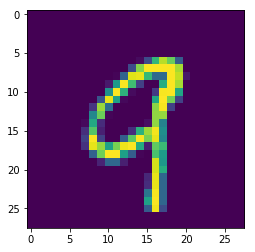

In [12]:
show_image(1000)
show_image(41999)
#show_image(42000)    starts at 0 - 419999

#for i in range(1000):
#    show_image(i)

In [13]:
x_reshaped = np.array([x.reshape(28,28) for x in x_vals])

In [14]:
x_reshaped.shape

(42000, 28, 28)

In [15]:
input_shape = (x_reshaped.shape[1], x_reshaped.shape[2])

In [16]:
y_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [17]:
import tensorflow as tf
import keras as keras

y_np_labels = keras.utils.to_categorical(y_labels)


C:\Users\kumasaji\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y_np_labels, test_size = 0.2)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model_v1 = Sequential()
model_v1.add(Dense(64, input_shape = input_shape))
model_v1.add(Flatten())
model_v1.add(Activation('sigmoid')) 
model_v1.add(Dense(32))
model_v1.add(Activation('sigmoid')) 
model_v1.add(Dense(10))
model_v1.add(Activation('sigmoid')) 



In [21]:
model_v1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['mse',  'mae', 'mape'])

In [22]:
BATCH_SIZE = 64
EPOCHS = 10

In [27]:
history = model_v1.fit( x_train, 
    y_train,
    batch_size = BATCH_SIZE,                       
    epochs = EPOCHS,
    validation_split = 0.3,
    verbose=1)

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 6s 253us/step - loss: 1.1655 - mean_squared_error: 0.0763 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 128050160.3891 - val_loss: 0.5811 - val_mean_squared_error: 0.0503 - val_mean_absolute_error: 0.0860 - val_mean_absolute_percentage_error: 17234383.7302
Epoch 2/10
23520/23520 [==============================] - 5s 199us/step - loss: 0.4183 - mean_squared_error: 0.0527 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 9160325.7061 - val_loss: 0.3275 - val_mean_squared_error: 0.0550 - val_mean_absolute_error: 0.0775 - val_mean_absolute_percentage_error: 5008731.9365
Epoch 3/10
23520/23520 [==============================] - 5s 194us/step - loss: 0.2697 - mean_squared_error: 0.0551 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 3726477.9776 - val_loss: 0.2482 - val_mean_squared_error: 0.0574 - val_mean_absolute_error: 0.0766 - val_me

In [28]:
#history.history

In [29]:
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [30]:
#sn.heatmap(cn, annot=True, fmt='.2f',
#          cmap = sn.color.pallette('RdB_r',1) )

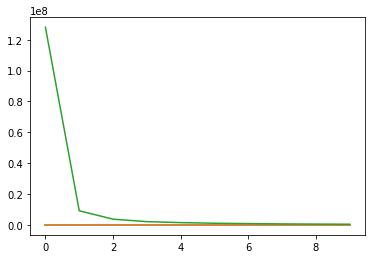

In [31]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
#plt.plot(history.history['cosine_proximity'])
plt.show()

In [32]:
y_test_labels = keras.utils.to_categorical(y_labels)

In [33]:
y_test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [34]:
#for i,val in enumerate(y_test_labels):
#        print(i, val)

In [39]:
actual = 3
predicted = 3
nums = 20

digit_4_indexes = [i for i,val in enumerate(y_test_labels)
                   if val == actual]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
print (type(digit_4_indexes)) # is a <generator object <genexpr> at 0x0000019F05085780>


NameError: name 'digit_4_indexes' is not defined

In [37]:
for val1 in range(10):
    print(next(digit_4_indexes))

NameError: name 'digit_4_indexes' is not defined

In [38]:
misclassified_indexes = [ii for ii,val1 in digit_4_indexes 
                         if y_pred[i] == predicted]

NameError: name 'digit_4_indexes' is not defined

In [524]:
misclassified_indexes

[]

In [2]:
kk=1
plt.figure(figsize=(15,6))
for i in misclassified_indexes[0:nums] :
    plt.subplot(2, nums/2, kk);
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.title(str(y_pred[i]) + str())
    kk = kk+1
    plt.show()

NameError: name 'plt' is not defined

## Convolutions

In [40]:
top = [[ 1, 1,1 ],
      [ 0, 0, 0 ],
      [ -1, -1, -1 ]]

top_np = np.array(top)

In [41]:
from scipy.ndimage.filters import convolve

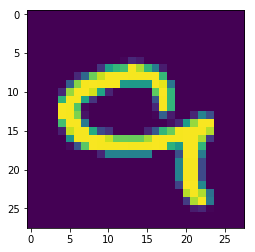

In [42]:
plt.imshow(x_test[0])

In [529]:
x_test[0].shape

(28, 28)

In [43]:
#plt.imread('c:\test.png')  img_0.shape

In [44]:
top_conv = plt.convolve(x_test[0], top)

AttributeError: module 'matplotlib.pyplot' has no attribute 'convolve'

In [45]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation

In [46]:
model_v2 = Sequential()
model_v2.add(Conv2D(filters=8,
                   kernel_size=(3,3),
                   input_shape=(28,28,1)))

In [47]:
model_v2.add(Flatten())
model_v2.add(Dense(32))
model_v2.add(Activation('sigmoid'))
model_v2.add(Dense(16))
model_v2.add(Activation('sigmoid'))
model_v2.add(Dense(10))
model_v2.add(Activation('softmax'))

In [48]:
model_v2.compile(optimizer='adam', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'])

In [49]:
x_train_reshape = x_train.reshape(x_train.shape[0], 28,28,1)

In [50]:
x_train.reshape?

In [56]:
BATCH_SIZE=64
EPOCH =10

history = model_v2.fit( x_train_reshape, 
    y_train,
    batch_size = BATCH_SIZE,                       
    epochs = EPOCHS,
    validation_split = 0.3,
    verbose=1)

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 25s 1ms/step - loss: 0.5275 - acc: 0.8417 - val_loss: 0.5325 - val_acc: 0.8351
Epoch 2/10
23520/23520 [==============================] - 19s 802us/step - loss: 0.5182 - acc: 0.8429 - val_loss: 0.5429 - val_acc: 0.8326
Epoch 3/10
23520/23520 [==============================] - 18s 777us/step - loss: 0.5177 - acc: 0.8415 - val_loss: 0.5421 - val_acc: 0.8329
Epoch 4/10
23520/23520 [==============================] - 17s 714us/step - loss: 0.5159 - acc: 0.8439 - val_loss: 0.5163 - val_acc: 0.8438
Epoch 5/10
23520/23520 [==============================] - 16s 689us/step - loss: 0.4808 - acc: 0.8527 - val_loss: 0.4947 - val_acc: 0.8475
Epoch 6/10
23520/23520 [==============================] - 16s 665us/step - loss: 0.4540 - acc: 0.8637 - val_loss: 0.4681 - val_acc: 0.8588
Epoch 7/10
23520/23520 [==============================] - 22s 921us/step - loss: 0.4683 - acc: 0.8587 - val_loss: 0.48

In [57]:
model_v2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                173088    
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
__________

In [58]:
from keras.layers import MaxPool2D

model_v3 = Sequential()
model_v3.add(Conv2D(filters=4,
                   kernel_size=(3,3),
                   input_shape=(28,28,1)))

model_v3.add(MaxPool2D(pool_size=(2,2)))

model_v3.add(Conv2D(filters=4,
                   kernel_size=(3,3),
                   input_shape=(28,28,1)))
model_v3.add(MaxPool2D(pool_size=(2,2)))

# fully connected layers
model_v3.add(Flatten())
model_v3.add(Dense(32))
model_v3.add(Activation('relu'))
model_v3.add(Dense(16))
model_v3.add(Activation('relu'))
model_v3.add(Dense(10))
model_v3.add(Activation('softmax'))

In [59]:
model_v3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                3232      
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
__________

In [60]:
model_v3.compile(optimizer='adam', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'])

In [61]:
BATCH_SIZE=64
EPOCH =10

history = model_v3.fit( x_train_reshape, 
    y_train,
    batch_size = BATCH_SIZE,                       
    epochs = EPOCHS,
    validation_split = 0.3,
    verbose=1)

Train on 23520 samples, validate on 10080 samples
Epoch 1/10
23520/23520 [==============================] - 20s 839us/step - loss: 5.4057 - acc: 0.2342 - val_loss: 1.8536 - val_acc: 0.3652
Epoch 2/10
23520/23520 [==============================] - 20s 867us/step - loss: 1.4008 - acc: 0.5520 - val_loss: 1.1466 - val_acc: 0.6090
Epoch 3/10
23520/23520 [==============================] - 20s 842us/step - loss: 0.9794 - acc: 0.6894 - val_loss: 0.8753 - val_acc: 0.7340
Epoch 4/10
23520/23520 [==============================] - 17s 709us/step - loss: 0.7564 - acc: 0.7762 - val_loss: 0.6573 - val_acc: 0.8229
Epoch 5/10
23520/23520 [==============================] - 17s 734us/step - loss: 0.5474 - acc: 0.8665 - val_loss: 0.4622 - val_acc: 0.8867
Epoch 6/10
23520/23520 [==============================] - 17s 741us/step - loss: 0.3987 - acc: 0.9045 - val_loss: 0.3779 - val_acc: 0.9064
Epoch 7/10
23520/23520 [==============================] - 18s 784us/step - loss: 0.2939 - acc: 0.9194 - val_loss: 0.

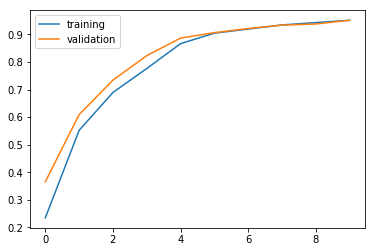

In [62]:
plt.plot(history.history['acc'], label = 'training')
plt.plot(history.history['val_acc'], label = 'validation')
plt.legend()